In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('') #route to the file
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [4]:
df.columns #nombre de las columnas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.dtypes #entender el tipo de datos que hay en cada columna

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.isnull().sum() #verifico si hay nulos

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum() #verifico si hay duplicados

np.int64(1171)

In [8]:
df.shape[0] #tenia 1171 duplicados, con el shape veo que tenia 3755 filas en el dataset

3755

In [9]:
df.drop_duplicates(inplace=True) #eliminamos duplicados para que no interfieran en el analisis. 

In [10]:
df.duplicated().sum() #reviso si hay duplicados despues del delete

np.int64(0)

In [11]:
df.shape[0] #como es ahora mi df? ahora tiene 2584 filas

2584

### EDA


### Cual es el tipo de empleo que gana mas dinero?

In [12]:
#primero saco la media de salario por job title en descendente para ver cuales son los mayores
average_salary = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).round(2)
average_salary

job_title
Head of Machine Learning          6000000.00
Principal Data Architect          3000000.00
Lead Machine Learning Engineer    2548666.67
Lead Data Scientist                928485.33
Data Analytics Lead                922500.00
                                     ...    
Insight Analyst                     38500.00
Compliance Data Analyst             30000.00
Autonomous Vehicle Technician       26277.50
Staff Data Analyst                  15000.00
Product Data Scientist               8000.00
Name: salary, Length: 93, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#paso a hacer el grafico, para ello, tengo que pasar a df los datos, hago el reset index para colocarlo
avg_salary_df = pd.DataFrame(average_salary).reset_index()
avg_salary_df.columns = ['job_title', 'salary']

#como son muchos job titles, selecciono un grupo de top 5 jobs y verifico que está ok la tabla
top10_salaries = df.nlargest(10, 'salary')
top10_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
3574,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3646,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3475,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
3476,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
2358,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
1462,2023,MI,FT,Head of Data Science,5000000,INR,60795,IN,50,IN,L


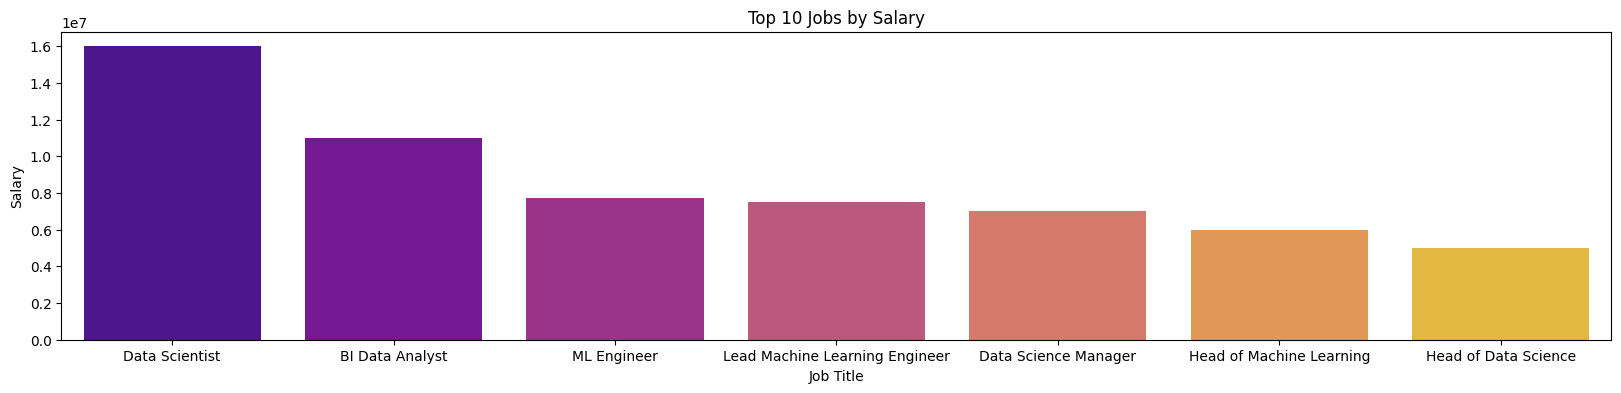

In [15]:
#paso a construir el grafico, voy a hacer un grafico de barras con la variable top 5 que cree antes
fig = plt.figure(figsize=(20, 4))
sns.barplot(x='job_title',y='salary',data=top10_salaries, palette='plasma', hue='job_title', errorbar=None)
plt.xticks(rotation=0)
plt.title('Top 10 Jobs by Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

### Donde estan localizadas las companias que mas pagan?

In [16]:
df['salary'].max()

np.int64(30400000)

In [17]:
salario_medio_por_ubicacion = df.groupby('company_location')['salary'].mean()

ubicacion_empresa_mayor_salario = salario_medio_por_ubicacion.idxmax()

salario_maximo = salario_medio_por_ubicacion.max()

print(f'Las empresas que más pagan están ubicadas en {ubicacion_empresa_mayor_salario} siendo el salario mayor de {salario_maximo}')

Las empresas que más pagan están ubicadas en CL siendo el salario mayor de 30400000.0


Hacemos el grafico basado en los top 10 salarios anteriores, comparando ahora con la company location

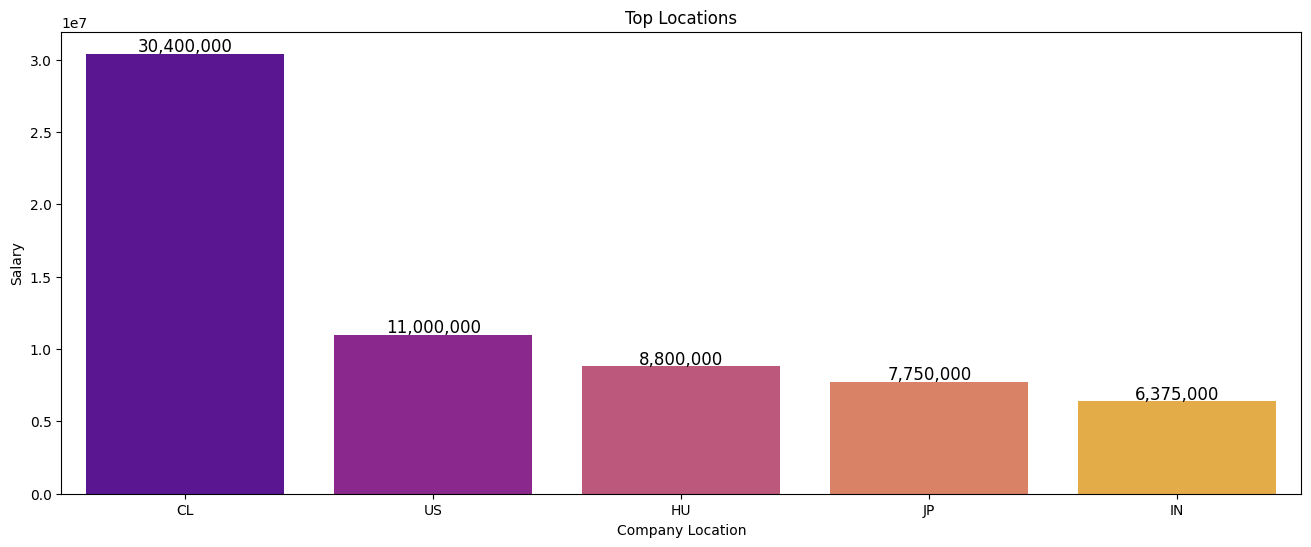

In [18]:
df_salario_medio = pd.DataFrame(salario_medio_por_ubicacion)
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(x='company_location', y='salary', data=top10_salaries, palette='plasma', hue='company_location', errorbar=None)

# Añadir el valor del mayor salario dentro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                ha='center', 
                va='center',  # Alineación vertical del texto
                fontsize=12, 
                color='black', 
                xytext=(0, 5),  # Mueve el texto hacia arriba
                textcoords='offset points')

# Añadir títulos y etiquetas
plt.title('Top Locations')
plt.xlabel('Company Location')
plt.ylabel('Salary')

plt.show()


### Cual es el tipo de empleo que permite mas trabajo remoto?


In [19]:
df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [20]:
remote_ratio_df = pd.DataFrame(df[df['remote_ratio'] == 100]['job_title'].value_counts()).reset_index()
remote_ratio_df

,job_title,count
0,Data Engineer,287
1,Data Scientist,237
2,Data Analyst,194
3,Machine Learning Engineer,90
4,Analytics Engineer,50
...,...,...
70,BI Data Engineer,1
71,Applied Machine Learning Engineer,1
72,Compliance Data Analyst,1
73,Data Quality Analyst,1


Para visualizarlo, voy a fijarme en el % vs el total, Como son muchos job titles, hago una seleccion del top 20

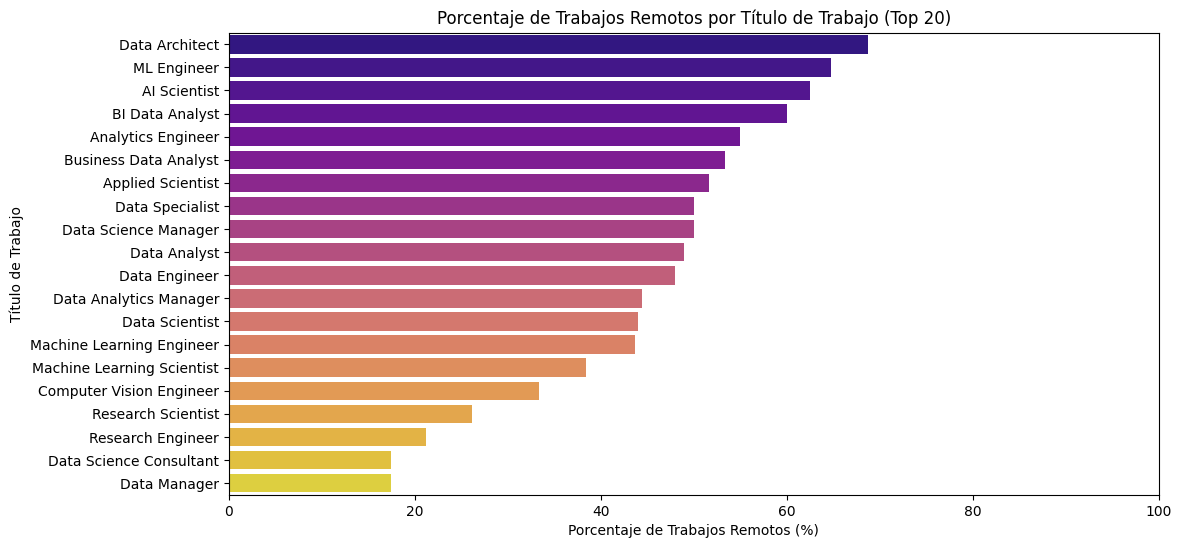

In [54]:
# Paso 1: Calcular el total de trabajos por título
total_jobs_df = df['job_title'].value_counts().reset_index()
total_jobs_df.columns = ['job_title', 'total_jobs']  # Renombrar columnas

# Paso 2: Calcular el número de trabajos remotos
remote_jobs_df = pd.DataFrame(df[df['remote_ratio'] == 100]['job_title'].value_counts()).reset_index()
remote_jobs_df.columns = ['job_title', 'remote_jobs']  # Renombrar columnas

# Paso 3: Unir ambos DataFrames
merged_df = pd.merge(total_jobs_df, remote_jobs_df, on='job_title', how='left').fillna(0)

# Paso 4: Calcular el porcentaje de trabajos remotos
merged_df['remote_ratio_percentage'] = (merged_df['remote_jobs'] / merged_df['total_jobs']) * 100

# Paso 5: Filtrar los 20 títulos de trabajo más comunes
top_20_jobs = merged_df.nlargest(20, 'total_jobs')

# Paso 6: Ordenar en orden ascendente por el porcentaje de trabajos remotos
top_20_jobs = top_20_jobs.sort_values(by='remote_ratio_percentage', ascending=False)

# Paso 7: Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio_percentage', y='job_title', data=top_20_jobs, palette='plasma')
plt.title('Porcentaje de Trabajos Remotos por Título de Trabajo (Top 20)')
plt.xlabel('Porcentaje de Trabajos Remotos (%)')
plt.ylabel('Título de Trabajo')
plt.xlim(0, 100)  # Ajustar el límite del eje x
plt.show()


### salario promedio de Data Scientist

In [22]:
data_scientist = df[df['job_title'] == 'Data Scientist'] #primero saco el numero de data scientists, si el job title coincide
salario_medio = data_scientist['salary'].mean() #despues saco la media del salario de ese grupo
salario_medio

np.float64(286453.71375464683)

In [23]:
data_scientist_df = df[df['job_title'] == 'Data Scientist']

Para visualizarlo, voy a crear un grafico que compare la media salarial de los Data Scientist Vs la media del resto de posiciones

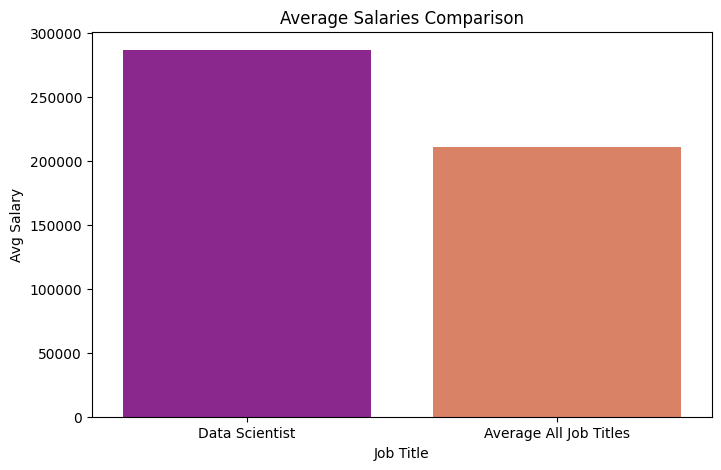

In [39]:
# Paso 1: Calcular la media de salarios de Data Scientists
mean_salary_data_scientist = df[df['job_title'] == 'Data Scientist']['salary'].mean()

# Paso 2: Calcular la media de salarios de todos los títulos de trabajo
mean_salary_all = df['salary'].mean()

# Paso 3: Crear un DataFrame para las medias
salary_comparison = pd.DataFrame({
    'Job Title': ['Data Scientist', 'Average All Job Titles'],
    'Mean Salary': [mean_salary_data_scientist, mean_salary_all]
})

# Paso 4: Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Job Title', y='Mean Salary', data=salary_comparison, palette='plasma')

# Ajustes adicionales
plt.title('Average Salaries Comparison')
plt.xlabel('Job Title')
plt.ylabel('Avg Salary')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.show()

### ¿cuantas personas ganan por encima de los 200ks?

In [25]:
# Filtrar las personas que ganan más de 200,000 USD y contar el número de filas
above_200k_count = df[df['salary_in_usd'] > 200000].shape[0]
df[df['salary']>200000].shape[0]

450

In [26]:
#otra forma de ejecutarlo
len(df[df['salary']>200000])

450

Con el dato anterior, voy a visualizarlo para ver de todo el DataFrame cuantos estan por encima de 200K y por debajo para hacernos una idea del rango. 


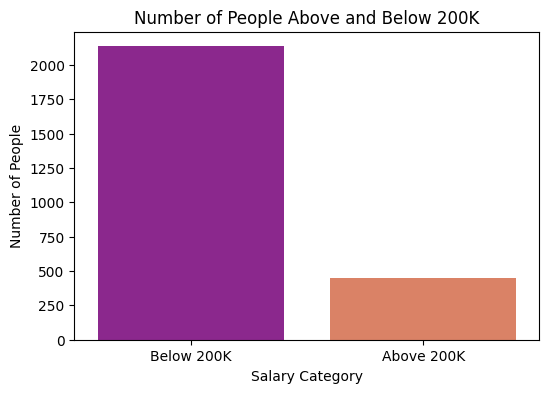

In [40]:
# Crear categorías de salarios
df['salary_category'] = df['salary'].apply(lambda x: 'Above 200K' if x > 200000 else 'Below 200K')

# Contar cuántas personas hay en cada categoría
salary_count = df['salary_category'].value_counts()

# Crear gráfico de barras
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=salary_count.index, y=salary_count.values, palette='plasma')

# Añadir títulos y etiquetas
plt.title('Number of People Above and Below 200K')
plt.xlabel('Salary Category')
plt.ylabel('Number of People')

plt.show()


hago lo mismo visualizado en piechart 

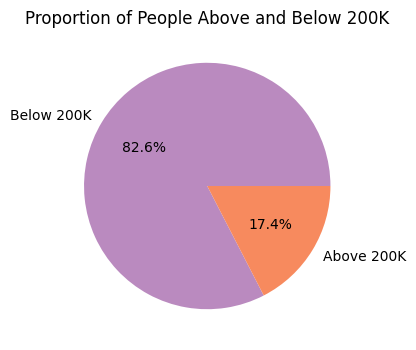

In [47]:
colors = ['#ba8abf', '#f78a5e']  # Rojo claro y azul claro

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(salary_count, labels=salary_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of People Above and Below 200K')

plt.show()

### ¿ cual es el salario promedio de los empleados Data Modeler en SE?

In [29]:
df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]['salary_in_usd'].mean()

np.float64(118900.0)

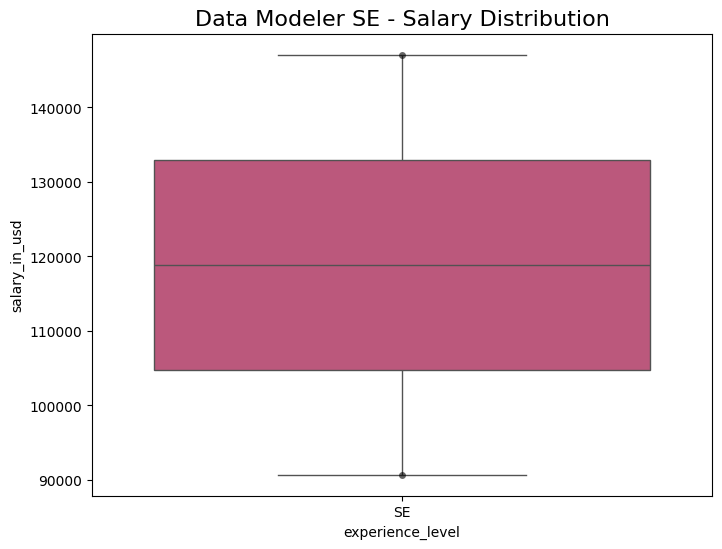

In [48]:
# Filtrar los datos para incluir solo a Data Modeler con experiencia 'SE'
data_modeler_se = df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un boxplot para visualizar la distribución del salario
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_modeler_se, palette='plasma')

# Añadir un swarmplot para mostrar los puntos individuales de los salarios
sns.swarmplot(x='experience_level', y='salary_in_usd', data=data_modeler_se, color='black', alpha=0.6)

# Añadir título y etiquetas
plt.title('Data Modeler SE - Salary Distribution', fontsize=16)

# Mostrar el gráfico
plt.show()


### Para los ML Engineer, que diferencia de salario hay entre full time y part time?

Solución en código

In [32]:
salary_FT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['PT']

print(salary_FT - salary_PT) #diferencia en valor absoluto
print((salary_FT-salary_PT) / salary_FT) #me da el porcentaje
print(salary_FT/salary_PT) #me da las veces que gana mas (10 veces mas)

salary_in_usd    152117.9
dtype: float64
salary_in_usd    0.905012
dtype: float64
salary_in_usd    10.527615
dtype: float64


Visualización: 

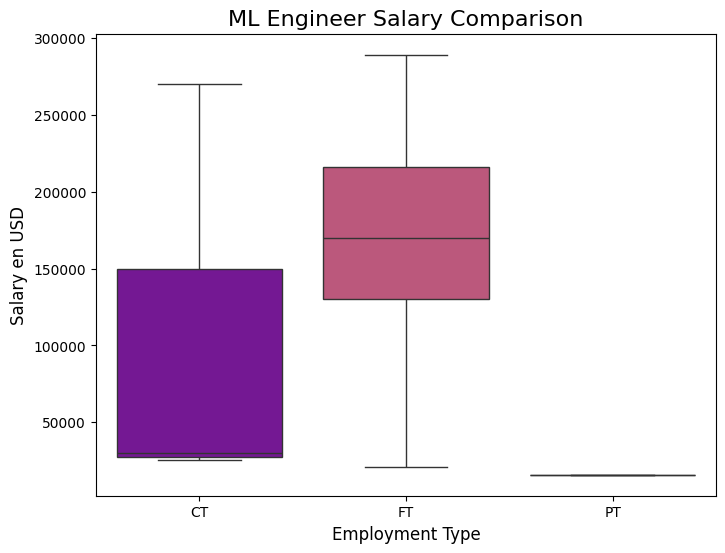

In [53]:
# Filtrar los datos para incluir solo a ML Engineers
ml_engineer = df[df['job_title'] == 'ML Engineer']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear el boxplot para comparar los salarios entre full-time y part-time
sns.boxplot(x='employment_type', y='salary_in_usd', data=ml_engineer, palette='plasma')

# Añadir título y etiquetas
plt.title('ML Engineer Salary Comparison', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Salary en USD', fontsize=12)

# Mostrar el gráfico
plt.show()

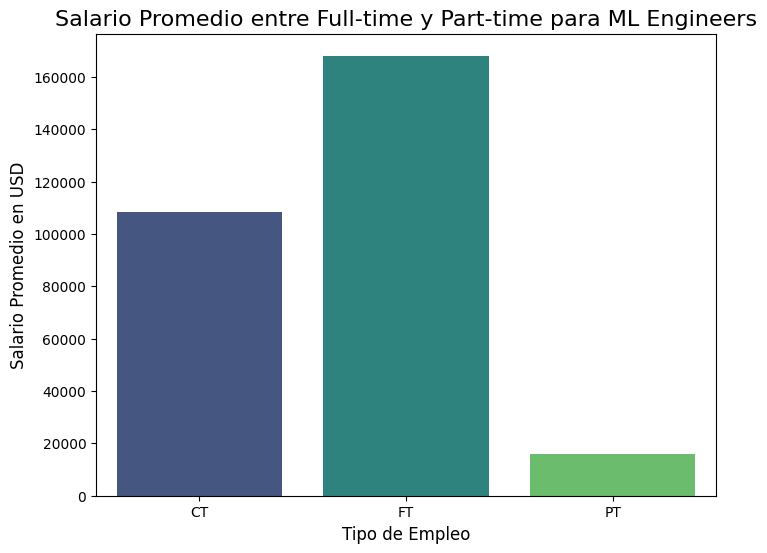

In [51]:
# Calcular el salario promedio por tipo de empleo (full-time vs part-time) para ML Engineers
average_salary_ml = ml_engineer.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras para comparar el salario promedio entre full-time y part-time
sns.barplot(x='employment_type', y='salary_in_usd', data=average_salary_ml, palette='viridis')

# Añadir título y etiquetas
plt.title('Salario Promedio entre Full-time y Part-time para ML Engineers', fontsize=16)
plt.xlabel('Tipo de Empleo', fontsize=12)
plt.ylabel('Salario Promedio en USD', fontsize=12)

# Mostrar el gráfico
plt.show()



### Cual es el employment type mas frecuente entre los Business Data Analyst

In [33]:
df[df['job_title'] == 'Data Analyst']['employment_type'].value_counts().head()

employment_type
FT    390
PT      5
CT      1
Name: count, dtype: int64

In [34]:
df[df['job_title'] == 'Data Analyst']['employment_type'].mode()

0    FT
Name: employment_type, dtype: object

In [35]:
Business_Analyst_ET = pd.DataFrame(df[['employment_type','job_title']][df['job_title'] == 'Business Data Analyst'].value_counts()).reset_index()
Business_Analyst_ET

,employment_type,job_title,count
0,FT,Business Data Analyst,14
1,CT,Business Data Analyst,1


Visualización: 

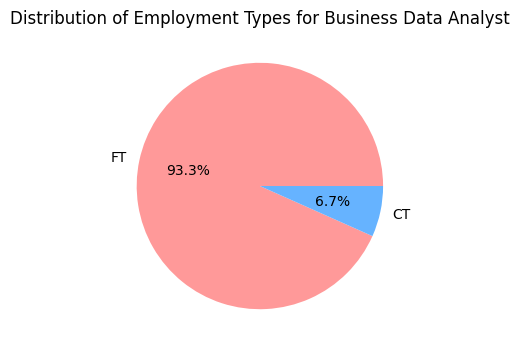

In [36]:
Business_Analyst_ET = df[df['job_title'] == 'Business Data Analyst']['employment_type'].value_counts().reset_index()

# Renombrar las columnas del DataFrame
Business_Analyst_ET.columns = ['employment_type', 'count']  # Asegúrate de que haya dos columnas

# Definir colores personalizados para el gráfico de pastel
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(Business_Analyst_ET['count'], labels=Business_Analyst_ET['employment_type'], autopct='%1.1f%%', colors=colors)

# Añadir título
plt.title('Distribution of Employment Types for Business Data Analyst')

plt.show()




### En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

In [37]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Below 200K
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Below 200K
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Below 200K
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Below 200K
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Below 200K


In [57]:
remote_per_country = df.groupby(['company_location'])['remote_ratio'].mean().sort_values(ascending=False)
remote_per_country[remote_per_country == 100]

company_location
PL    100.0
KE    100.0
MY    100.0
AR    100.0
PR    100.0
IR    100.0
NG    100.0
EG    100.0
PH    100.0
CR    100.0
SK    100.0
CL    100.0
CF    100.0
Name: remote_ratio, dtype: float64

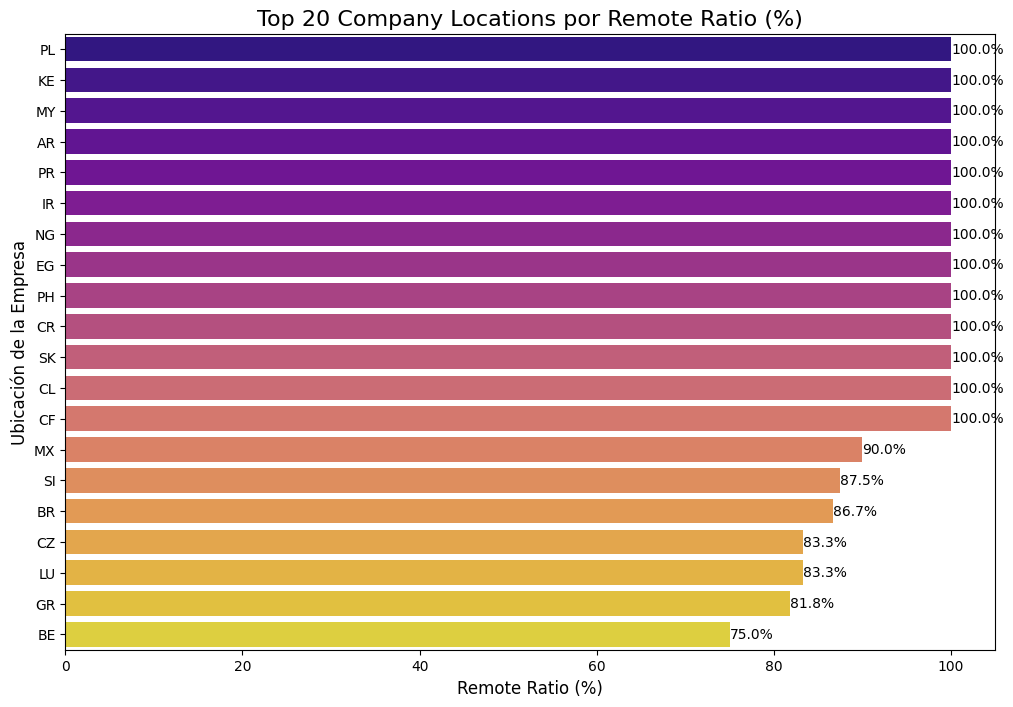

In [63]:
# Agrupar por company_location y calcular el promedio de remote_ratio
remote_ratio_company = df.groupby('company_location')['remote_ratio'].mean().reset_index()

# Renombrar las columnas para mayor claridad
remote_ratio_company.columns = ['company_location', 'average_remote_ratio']

# Ordenar el DataFrame en orden descendente (ahora trabajamos con valores de 0 a 100, no es necesario multiplicar por 100)
remote_ratio_company = remote_ratio_company.sort_values('average_remote_ratio', ascending=False)

# Seleccionar el top 20 de países con mayor remote ratio
top_20_remote_ratio = remote_ratio_company.head(20)

# Crear una figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
sns.barplot(x='average_remote_ratio', y='company_location', data=top_20_remote_ratio, palette='plasma')

# Añadir título y etiquetas
plt.title('Top 20 Company Locations por Remote Ratio (%)', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Ubicación de la Empresa', fontsize=12)

# Añadir los porcentajes a las barras
for index, value in enumerate(top_20_remote_ratio['average_remote_ratio']):
    plt.text(value, index, f'{value:.1f}%', va='center')

# Mostrar el gráfico
plt.show()


In [64]:
# Quiero sacar el nombre de los paises, para que quede más claro
# Extraer los nombres de los países del top 20
top_20_countries = top_20_remote_ratio['company_location'].tolist()

# Mostrar los nombres de los países
print("Top 20 países por remote ratio:")
for country in top_20_countries:
    print(country)


Top 20 países por remote ratio:
PL
KE
MY
AR
PR
IR
NG
EG
PH
CR
SK
CL
CF
MX
SI
BR
CZ
LU
GR
BE


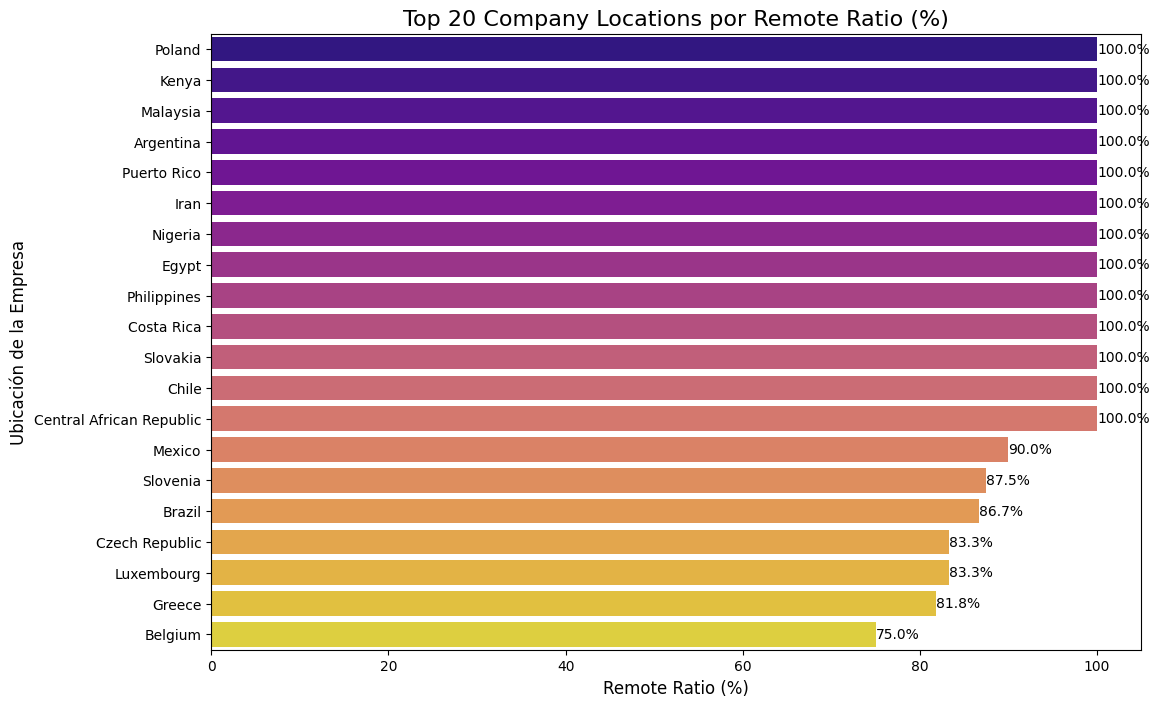

In [65]:
# Diccionario que mapea los códigos de país a sus nombres completos
country_codes = {
    'PL': 'Poland',
    'KE': 'Kenya',
    'MY': 'Malaysia',
    'AR': 'Argentina',
    'PR': 'Puerto Rico',
    'IR': 'Iran',
    'NG': 'Nigeria',
    'EG': 'Egypt',
    'PH': 'Philippines',
    'CR': 'Costa Rica',
    'SK': 'Slovakia',
    'CL': 'Chile',
    'CF': 'Central African Republic',
    'MX': 'Mexico',
    'SI': 'Slovenia',
    'BR': 'Brazil',
    'CZ': 'Czech Republic',
    'LU': 'Luxembourg',
    'GR': 'Greece',
    'BE': 'Belgium'
}

# Reemplazar los códigos de país por nombres completos usando el diccionario
top_20_remote_ratio['company_location'] = top_20_remote_ratio['company_location'].replace(country_codes)

# Crear una figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales con la paleta 'plasma'
sns.barplot(x='average_remote_ratio', y='company_location', data=top_20_remote_ratio, palette='plasma')

# Añadir título y etiquetas
plt.title('Top 20 Company Locations por Remote Ratio (%)', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Ubicación de la Empresa', fontsize=12)

# Añadir los porcentajes a las barras
for index, value in enumerate(top_20_remote_ratio['average_remote_ratio']):
    plt.text(value, index, f'{value:.1f}%', va='center')

# Mostrar el gráfico
plt.show()
